In [1]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv("./datasets/train.csv")
test=pd.read_csv("./datasets/test.csv")
submit=pd.read_csv("./datasets/gender_submission.csv")

In [3]:
#查看train空值欄位
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#查看test空值欄位
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
data=train.append(test)
data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5096\4113690083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#因為train,test數量不一樣需要將index重置做處理
data.reset_index(inplace=True,drop=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

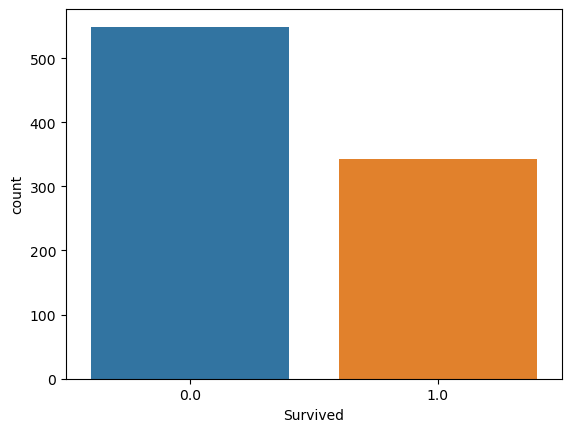

In [9]:
#觀察存活比率
sns.countplot(data['Survived'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

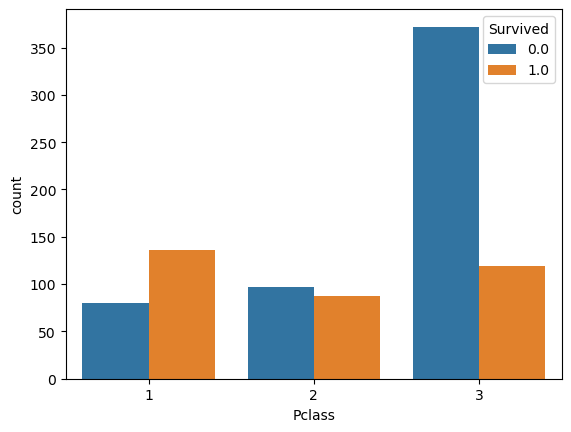

In [10]:
#觀察艙等跟存活率的關係
sns.countplot(data['Pclass'],hue=data['Survived'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

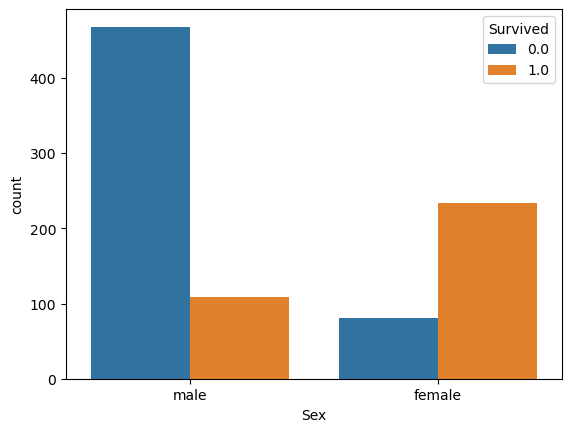

In [11]:
#觀察性別跟存活率的關係
sns.countplot(data['Sex'],hue=data['Survived'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

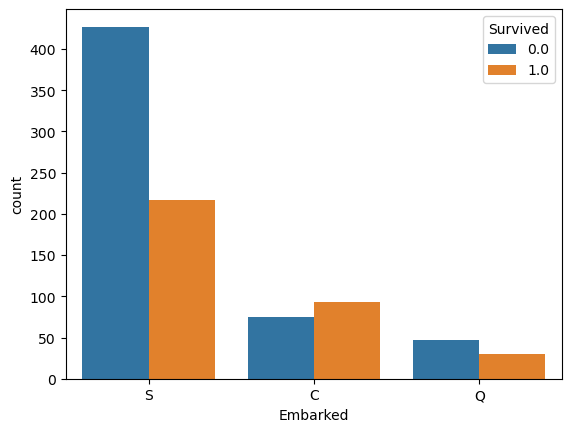

In [12]:
#觀察出發港口跟存活率的關係
sns.countplot(data['Embarked'],hue=data['Survived'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


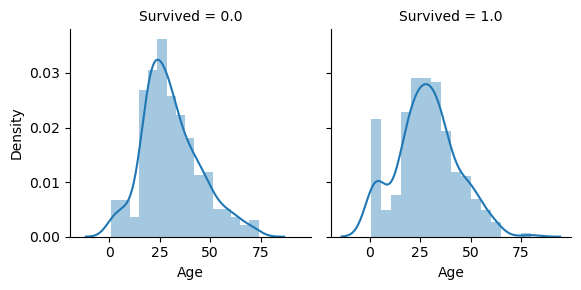

In [13]:
#當欄位數值是連續的時候使用displot,並且觀察年齡跟生存率的關係
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Age',kde=True)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


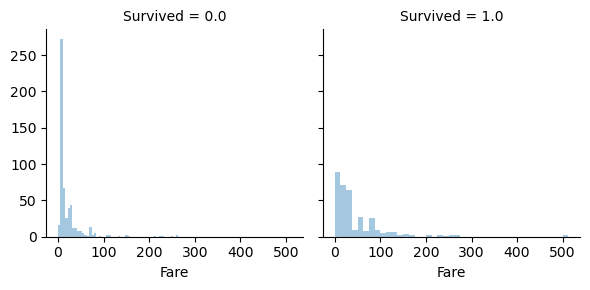

In [14]:
#當欄位數值是連續的時候使用displot,並且觀察票價跟生存率的關係
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


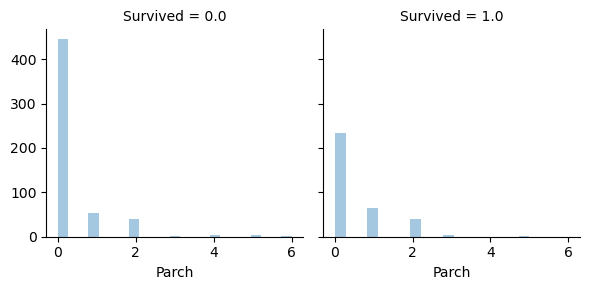

In [15]:
#當欄位數值是連續的時候使用displot,並且觀察父母＋小孩的數量跟生存率的關係
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Parch',kde=False)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


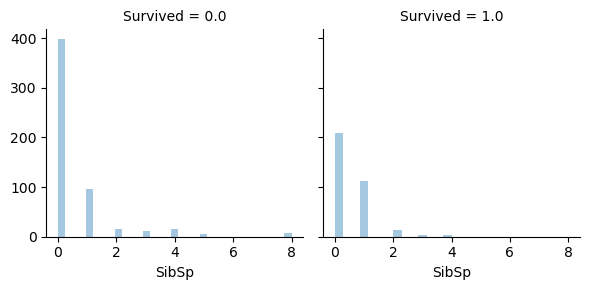

In [16]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'SibSp',kde=False)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


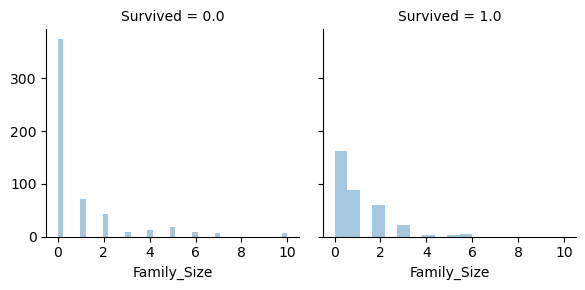

In [17]:
#將父母+小孩 加上兄弟姊妹+丈夫妻子合併為家庭
data['Family_Size']=data['Parch']+data['SibSp']
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Family_Size',kde=False)

# Feature Engineering

In [18]:
data['Title1']=data['Name'].str.split(", ",expand=True)[1]
data['Name'].str.split(",",expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [19]:
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [20]:
data['Title1']=data['Title1'].str.split(". ",expand=True)[0]
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [21]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer',
       'Dona'], dtype=object)

In [22]:
#對稱謂和性別作分析
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [23]:
#對稱謂和存活率作分析
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Survived,,,,,,,,,,,,,,,,,
0.000000,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.000000,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [24]:
#查看每個tilte的平均年齡,推論出Master平均年齡只有五歲非常小
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1    Pclass
Capt      1         70.000000
Col       1         54.000000
Don       1         40.000000
Dona      1         39.000000
Dr        1         45.600000
          2         38.500000
Jonkheer  1         38.000000
Lady      1         48.000000
Major     1         48.500000
Master    1          6.984000
          2          2.757273
          3          6.090000
Miss      1         30.338983
          2         20.717083
          3         17.360874
Mlle      1         24.000000
Mme       1         24.000000
Mr        1         41.450758
          2         32.346715
          3         28.318910
Mrs       1         43.208955
          2         33.518519
          3         32.326531
Ms        2         28.000000
          3               NaN
Rev       2         41.250000
Sir       1         49.000000
th        1         33.000000
Name: Age, dtype: float64

In [25]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','th','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [26]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [27]:
data.groupby('Title2')['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [28]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [29]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initia

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [30]:
list(data.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]

[(('Master', 1), 6.984),
 (('Master', 2), 2.7572727272727273),
 (('Master', 3), 6.090000000000001)]

In [31]:
data['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [32]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ticket_info', ylabel='count'>

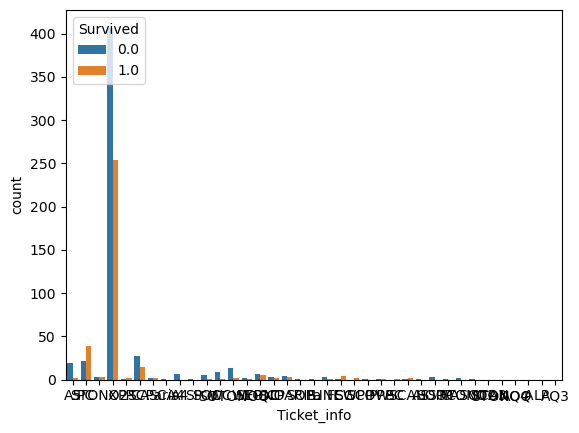

In [33]:
#得出A5的死亡率特別高
sns.countplot(data['Ticket_info'], hue=data['Survived'])

# Handle Missing Value

In [34]:
data.info()
#Age,Cabine,Embarked缺值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


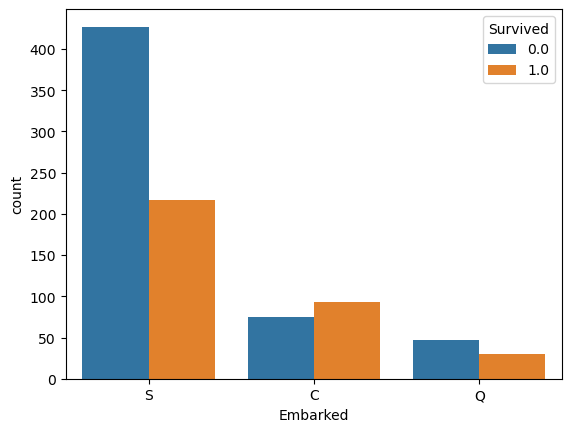

In [35]:
sns.countplot(data['Embarked'],hue=data['Survived'])
data['Embarked'] = data['Embarked'].fillna('S')

In [36]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [38]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [39]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [40]:
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

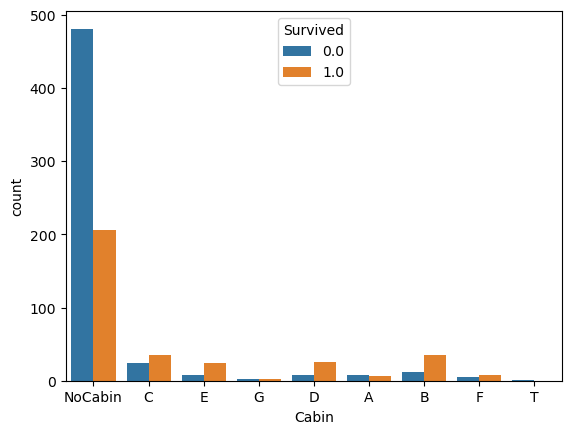

In [41]:
sns.countplot(data['Cabin'], hue=data['Survived'])

In [42]:
#將資料轉成category數字--astype('category').cat.codes
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes


In [43]:
data['Embarked']

0       2
1       0
2       2
3       2
4       2
       ..
1304    2
1305    0
1306    2
1307    2
1308    0
Name: Embarked, Length: 1309, dtype: int8

In [44]:
#用其他欄位資訊來預測age的缺失值
dataAgeNull = data[data["Age"].isnull()] #空值age
dataAgeNotNull = data[data["Age"].notnull()]#非空值age
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]#移除outlier

rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

RandomForestRegressor(n_estimators=2000, random_state=42)

In [45]:
#預測原本age的null空值
ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5096\2384783419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAgeNull.loc[:,"Age"] = ageNullValues
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5096\2384783419.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataAgeNull.append(dataAgeNotNull)


In [46]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"]) #Survival不是空的放入train
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"]) #Survial 空的放入test

In [47]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [48]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title1','Ticket_info','Cabin']]
dataTrain1 = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title1']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1','Ticket_info','Cabin']]



In [49]:
dataTrain1

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title1
263,0.0,22.000000,2,7.2500,2,1,1,12
264,1.0,38.000000,0,71.2833,0,0,1,13
265,1.0,26.000000,2,7.9250,2,0,0,9
266,1.0,35.000000,2,53.1000,0,0,1,13
267,0.0,35.000000,2,8.0500,2,1,0,12
...,...,...,...,...,...,...,...,...
973,0.0,27.000000,2,13.0000,1,1,0,15
974,1.0,19.000000,2,30.0000,0,0,0,9
176,0.0,19.099409,2,23.4500,2,0,3,9
975,1.0,26.000000,0,30.0000,0,1,0,12


In [50]:
from sklearn.model_selection import train_test_split
feature=['Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title1','Ticket_info','Cabin']
X_train, X_val, y_train, y_val = train_test_split(dataTrain[feature], dataTrain['Survived'], train_size = 0.7, random_state = 42)

# XGBOOST預測+K-fold

In [51]:
# #調整XGBoost最佳化
# from sklearn.model_selection import RandomizedSearchCV
# xgb_param = {'n_estimators':list(range(100,500)) , 
#          'max_depth':list(range(1,10)) , 
#          'learning_rate':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.05,0.09] ,
            
# }

# rscv = RandomizedSearchCV(xgb ,param_distributions=xgb_param ,  cv =5 , n_iter=10 , scoring = 'accuracy',n_jobs =-1 , verbose =10)
# rscv.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
# print(rscv.best_score_)
# print(rscv.best_estimator_)
# print(rscv.best_index_)
# print(rscv.best_params_)

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree= 0.6,
                          early_stopping_rounds=10, 
                          learning_rate= 0.05,
                          max_depth= 5,
                          min_child_weight= 7,
                          n_estimators= 512,
                          reg_alpha= 0,
                          random_state= 42,
                          objective= 'binary:logistic')

In [53]:
#Number of folds(K-folds)
N = 3

#Creating a dataframe for storing the multiple folds' probability of one, in other words, probability of survival for predicting val set and test set
test_probs_of_one = pd.DataFrame(np.zeros((len(dataTest), N)), columns= ['Fold_{}'.format(i) for i in range(1, N + 1)])

#Creating a dataframe for storing feature importances
feature_importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=feature)

# create empty lists to store the predictions and scores for each fold
fold_train_scores = []
fold_val_scores = []

In [54]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)

In [55]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    if fold > 0:
        print("")
    print(f"Training on fold {fold + 1}")

    # select the train and validation data and labels for this fold
    fold_X_train, fold_y_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    fold_X_val, fold_y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

    # fit the model on the training data
    xgb.fit(fold_X_train, fold_y_train, eval_set=[(fold_X_val, fold_y_val)], verbose=False)
    
    # Let's register feature importances for this fold in the feature_importances dataframe we created earlier
    feature_importances.iloc[:, fold] = xgb.feature_importances_
    
    #Now, let's calculate and print the fold scores X_train and X_val
    
    fold_train_score = xgb.score(X_train, y_train)
    fold_train_scores.append(fold_train_score)
    print(f"Fold {fold + 1} train score: {fold_train_score}")
    
    fold_val_score = xgb.score(X_val, y_val)
    fold_val_scores.append(fold_val_score)
    print(f"Fold {fold + 1} val score: {fold_val_score}")

    # Now we make prediction on test dataset using the model trained and this fold and we register probabilites in test_probs_of_one dataframe
    test_probs_of_one.loc[:, 'Fold_{}'.format(fold+1)] = xgb.predict_proba(dataTest[feature])[:,1]
     
# calculate the average accuracy score across all folds
avg_train_score = sum(fold_train_scores) / N
avg_val_score = sum(fold_val_scores) / N
    
print(f"\nAverage train score across {N} folds: {avg_train_score}")
print(f"Average val score across {N} folds: {avg_val_score}")

Training on fold 1
Fold 1 train score: 0.8571428571428571
Fold 1 val score: 0.8246268656716418

Training on fold 2
Fold 2 train score: 0.8459069020866774
Fold 2 val score: 0.8022388059701493

Training on fold 3
Fold 3 train score: 0.8009630818619583
Fold 3 val score: 0.8097014925373134

Average train score across 3 folds: 0.8346709470304976
Average val score across 3 folds: 0.812189054726368


In [56]:
test_probs_of_one['avg_prob_of_one']=(test_probs_of_one.sum(axis=1)/N)
test_probs_of_one.head()

,Fold_1,Fold_2,Fold_3,avg_prob_of_one
0,0.213416,0.144491,0.196880,0.184929
1,0.448641,0.433406,0.629090,0.503712
2,0.132952,0.126045,0.183639,0.147546
3,0.099965,0.140225,0.172627,0.137606
4,0.465242,0.394812,0.572583,0.477546


In [57]:
threshold= 0.4
test_probs_of_one['pred']= test_probs_of_one['avg_prob_of_one'].apply(lambda x: 1 if x>= threshold else 0)
test_probs_of_one.head()

,Fold_1,Fold_2,Fold_3,avg_prob_of_one,pred
0,0.213416,0.144491,0.196880,0.184929,0
1,0.448641,0.433406,0.629090,0.503712,1
2,0.132952,0.126045,0.183639,0.147546,0
3,0.099965,0.140225,0.172627,0.137606,0
4,0.465242,0.394812,0.572583,0.477546,1


In [58]:
xgb_result=test_probs_of_one['pred'].values
submit['Survived'] = xgb_result
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submission_xgboost.csv', index=False)
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Random Forest預測

In [59]:
#調整random forest參數最佳化
# rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16, 20], "n_estimators": [50, 100, 400, 700, 1000]}
# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# gs = gs.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

# print(gs.best_score_)
# print(gs.best_params_) 

In [60]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 
rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

print("%.4f" % rf.oob_score_)

0.8238


In [61]:
print(dataTrain.iloc[:, 0])

263    0.0
264    1.0
265    1.0
266    1.0
267    0.0
      ... 
973    0.0
974    1.0
176    0.0
975    1.0
976    0.0
Name: Survived, Length: 891, dtype: float64


In [62]:
#查看各個feature的重要度
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.291676
2,Fare,0.152906
6,Title1,0.151738
0,Age,0.123515
3,Pclass,0.091357
5,Family_Size,0.068127
8,Cabin,0.065712
7,Ticket_info,0.029965
1,Embarked,0.025005


In [63]:
rf_result=rf.predict(dataTest)
submit['Survived']=rf_result
submit['Survived']=submit['Survived'].astype(int)
submit.to_csv('submission_randomforest.csv',index=False)

In [64]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
